In [1]:
from PIL import Image
from PIL import ImageDraw
import numpy as np

In [2]:
## Find the endpoint of a line segment with given start coordinate (x,y), angle (in radians) and distance
### returns endpoint with x and y values rounded to (closest?) integer, optional argument if angle given in degrees
def line_segment_endpoint(coord, angle, dist, degrees = False):
    if degrees == True:
        angle = angle * np.pi/180
        return (int(dist*np.cos(angle) + coord[0]), int(dist*np.sin(angle) + coord[1]))
    else:
        return (int(dist*np.cos(angle) + coord[0]), int(dist*np.sin(angle) + coord[1]))

In [3]:
#  Find angle between two points, output is in radians
def angle_between(pt1,pt2):
    if pt1 == pt2:
        return 0
    if pt1[1] <= pt2[1]:
        (x1, y1) = pt1
        (x2, y2) = pt2
        adjacent = x2-x1 
        hypot = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        return np.arccos(adjacent/hypot)
    if pt1[1] > pt2[1]:
        (x1, y1) = pt1
        (x2, y2) = pt2
        adjacent = x2-x1 
        hypot = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        return 2*np.pi - np.arccos(adjacent/hypot)

In [4]:
def dist_betw_points(p1,p2):
    dist = np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
    return dist

In [22]:
pt1 = (5,5)
pt2 = (5,4.9)
print(angle_between(pt1,pt2))
print(angle_between(pt1,pt2)*180/np.pi)

4.71238898038469
270.0


In [5]:
#  Creates a quadrilateral that takes two points, a perspective point, edge color and face color, depth
#  pt_pair = ((x1,y1),(x2,y2))

def perspective_quad(drawable, pt_pair, depth, persp_pt = (0,0), edge_color = (255,255,255), face_color = (0,0,0)):
    depth_pts = []
    for pt in pt_pair:
        depth_pts.append(line_segment_endpoint(pt, angle_between(pt, persp_pt), depth))
    quad_pts = [pt_pair[0], pt_pair[1], depth_pts[1], depth_pts[0]]
    drawable.polygon(quad_pts, fill=face_color, outline=edge_color)

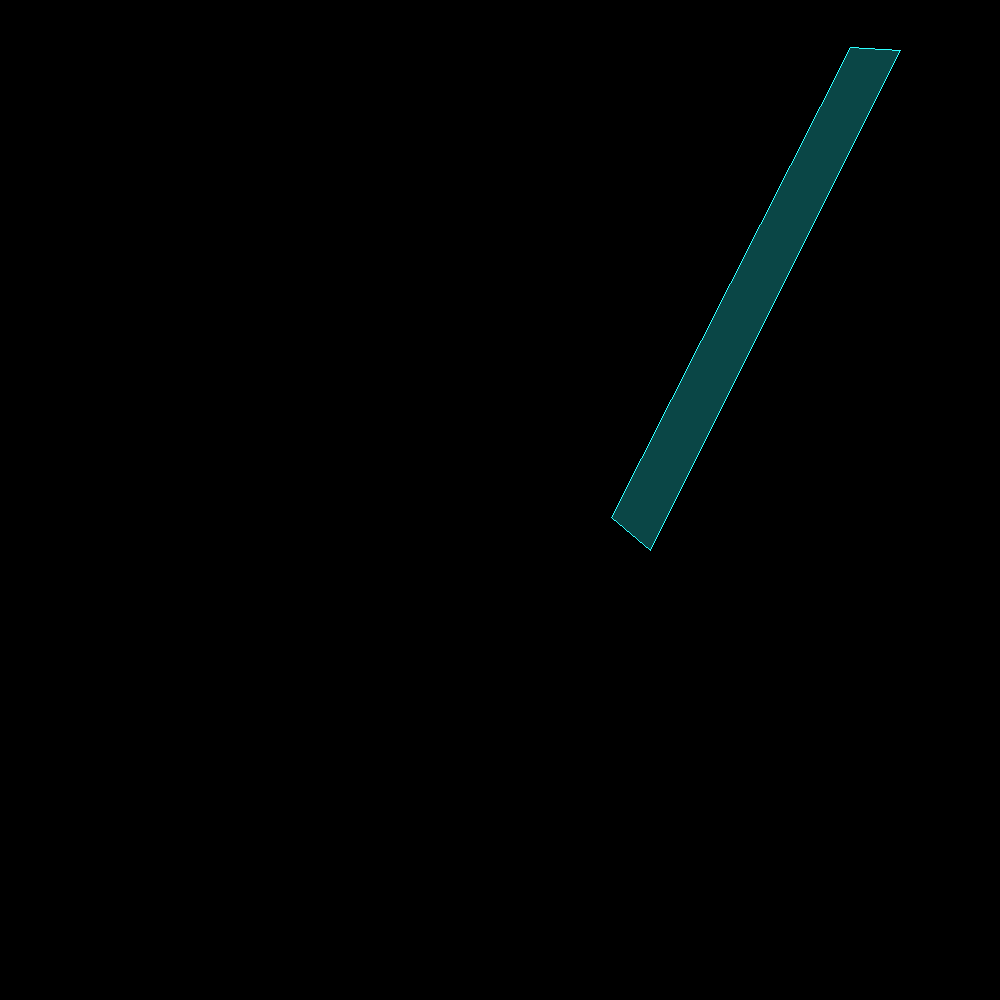

In [42]:
image = Image.new('RGB', (1000,1000))
draw = ImageDraw.Draw(image)
pt1 = (900,50)
pt2 = (650,550)
persp_pt = (0,0)
edge_color = (45,255,255)
face_color = (10,70,70)
depth = 50

perspective_quad(draw, [pt1,pt2], depth, persp_pt, edge_color, face_color)
image

In [7]:
#  Creates a quadrilateral (polygon) with a depth that is proportianal to it's longest (shortest?) side
#  Inputs should be the location of the vertices, depth
#  Other input(s) include the point of perspective (default = (0,0))

def perspective_gon(drawable, vertex_list, depth, persp_pt = (0,0), edge_color = (255,255,255), surface_color = (0,0,0), side_color = (0,0,0)):
    vertices = []
    for vertex in vertex_list:
        vertex_dict = {}
        vertex_dict['vertex'] = vertex  
        (x1,y1) = vertex
        (x2,y2) = persp_pt
        distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        vertex_dict['distance'] = distance
        vertex_dict['neighbors'] = [vertex_list[(vertex_list.index(vertex)-1) % len(vertex_list)], vertex_list[(vertex_list.index(vertex)+1) % len(vertex_list)]]
        vertices.append(vertex_dict)
    def myFunc(e):
        return e['distance']
    vertices.sort(key = myFunc)
    vertices.reverse()
    for vertex in vertices:
        if dist_betw_points(vertex['neighbors'][0], persp_pt) >= dist_betw_points(vertex['neighbors'][1], persp_pt):
            perspective_quad(drawable, (vertex['neighbors'][0], vertex['vertex']), depth, persp_pt, edge_color, side_color)
            perspective_quad(drawable, (vertex['neighbors'][1], vertex['vertex']), depth, persp_pt, edge_color, side_color)
        else:
            perspective_quad(drawable, (vertex['neighbors'][1], vertex['vertex']), depth, persp_pt, edge_color, side_color)
            perspective_quad(drawable, (vertex['neighbors'][0], vertex['vertex']), depth, persp_pt, edge_color, side_color)
    #drawable.polygon(quad_pts, fill=face_color, outline=edge_color)
    draw.polygon(vertex_list, fill = surface_color, outline = edge_color)

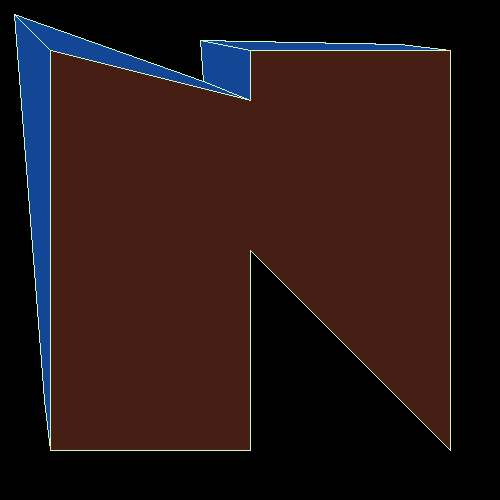

In [8]:
image = Image.new('RGB', (500,500))
draw = ImageDraw.Draw(image)
vertex_list = [(50,50),(50,450),(250,450), (250,250), (450,450), (450,50), (250,50), (250,100)]
depth = 50
persp_pt = (0,0)
edge_color = (200,250,200)
surface_color = (70,30,20)
side_color = (20,70,150)
perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)
image

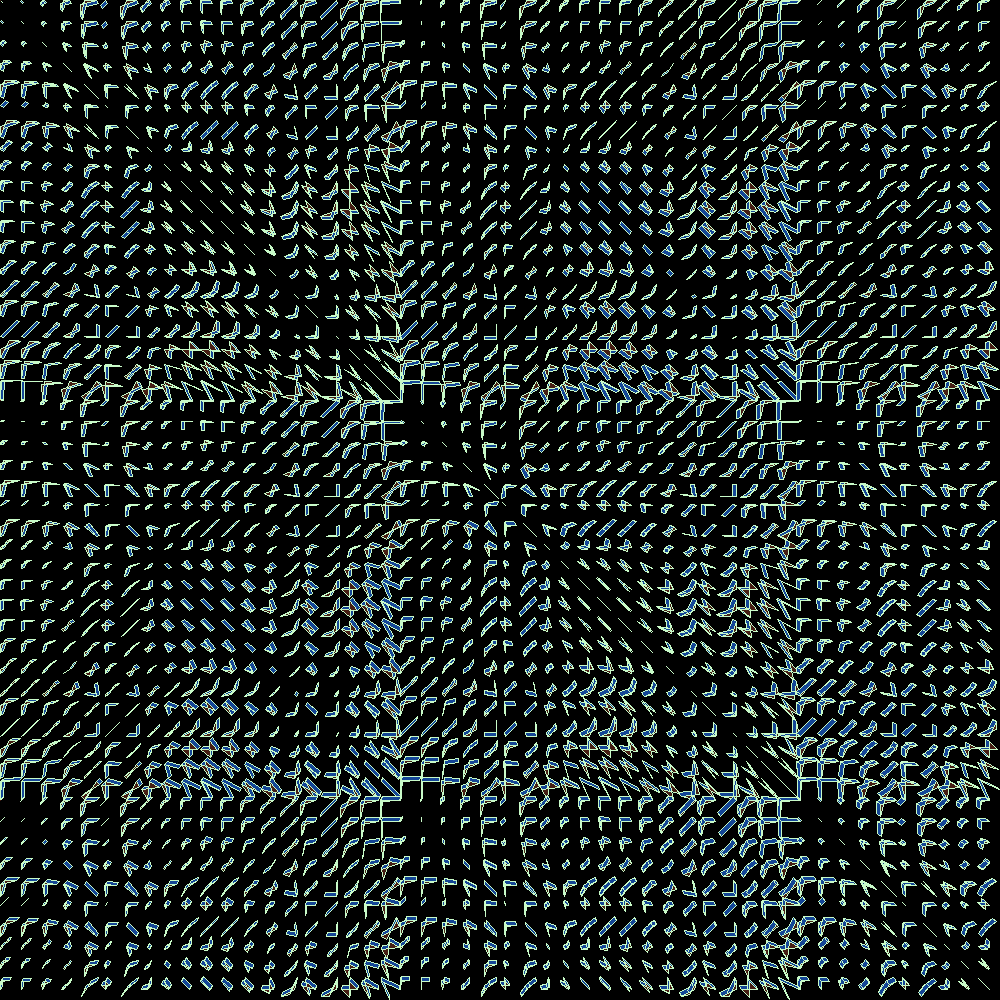

In [33]:
image = Image.new('RGB', (1000,1000))
draw = ImageDraw.Draw(image)
edge_color = (200,250,200)
surface_color = (70,30,20)
side_color = (20,70,150)
for i in range(50):
    for j in range(50):
        pt1 = (i*20 + i%20, j*20 + j%20)
        pt2 = (i*20 + (i**2)%20, j*20 + (j**2)%20)
        pt3 = (i*20 + j%20, j*20 + i%20)
        pt4 = (i*20 + (j**2)%20, j*20 + (i**2)%20)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 4
        persp_pt = (500,500)
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)
image

In [34]:
image.save('felt.png')

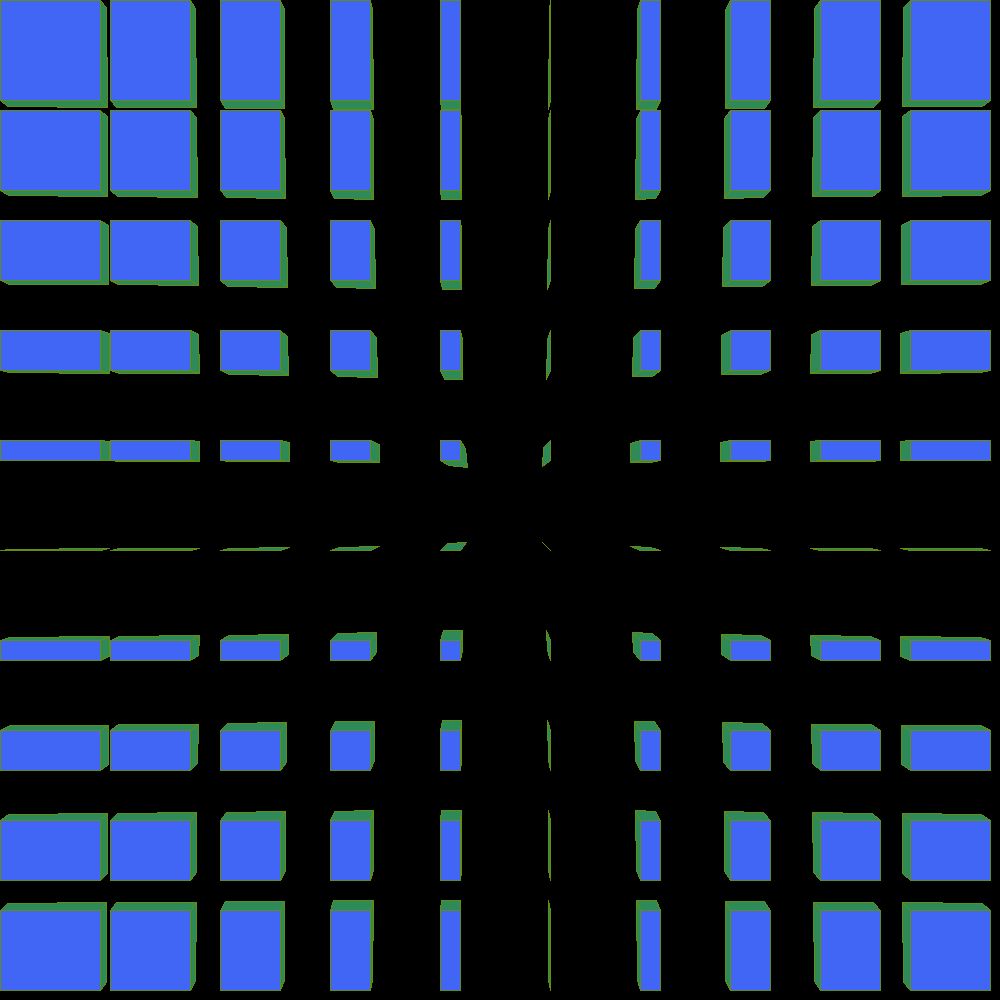

In [38]:
image = Image.new('RGB', (1000,1000))
draw = ImageDraw.Draw(image)
edge_color = (100,140,17)
surface_color = (65,102,245)
side_color = (46,139,87)
for i in range(10):
    for j in range(10):
        pt1 = (i*100 + 10*i, j*100 + 10*j)
        pt2 = (i*100 + 100 - 10*i, j*100 +10*j)
        pt3 = (i*100+100 -10*i, j*100 +100 - j*10)
        pt4 = (i*100 + 10*i, j*100 +100 - 10*j)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 10
        persp_pt = (500,500)
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)
image

In [40]:
image.save('smash.png')

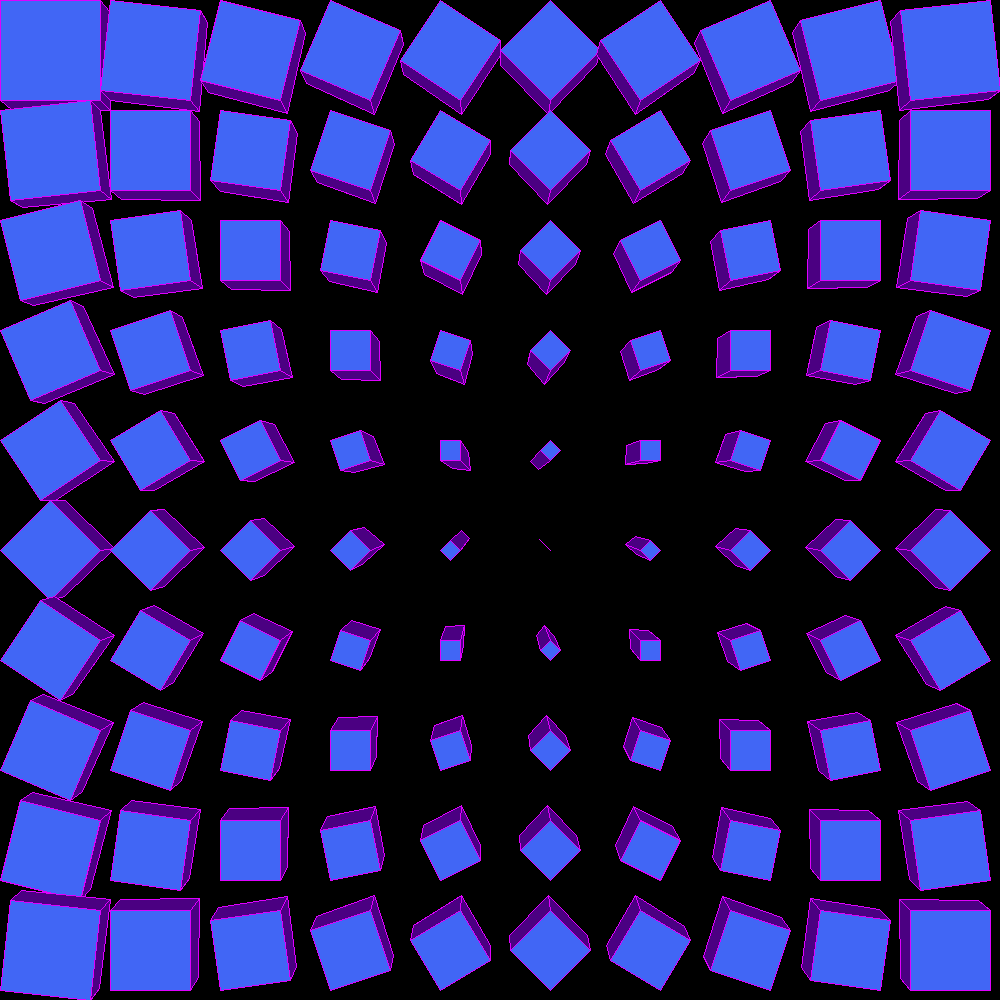

In [41]:
image = Image.new('RGB', (1000,1000))
draw = ImageDraw.Draw(image)
edge_color = (223,0,255)
surface_color = (65,102,245)
side_color = (75,0,130)
for i in range(10):
    for j in range(10):
        pt1 = (i*100 + 10*i, j*100 + 10*j)
        pt2 = (i*100 + 100 - 10*j, j*100 +10*i)
        pt3 = (i*100+100 -10*i, j*100 +100 - j*10)
        pt4 = (i*100 + 10*j, j*100 +100 - 10*i)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 15
        persp_pt = (500,500)
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)
image

In [42]:
image.save('rotate.png')

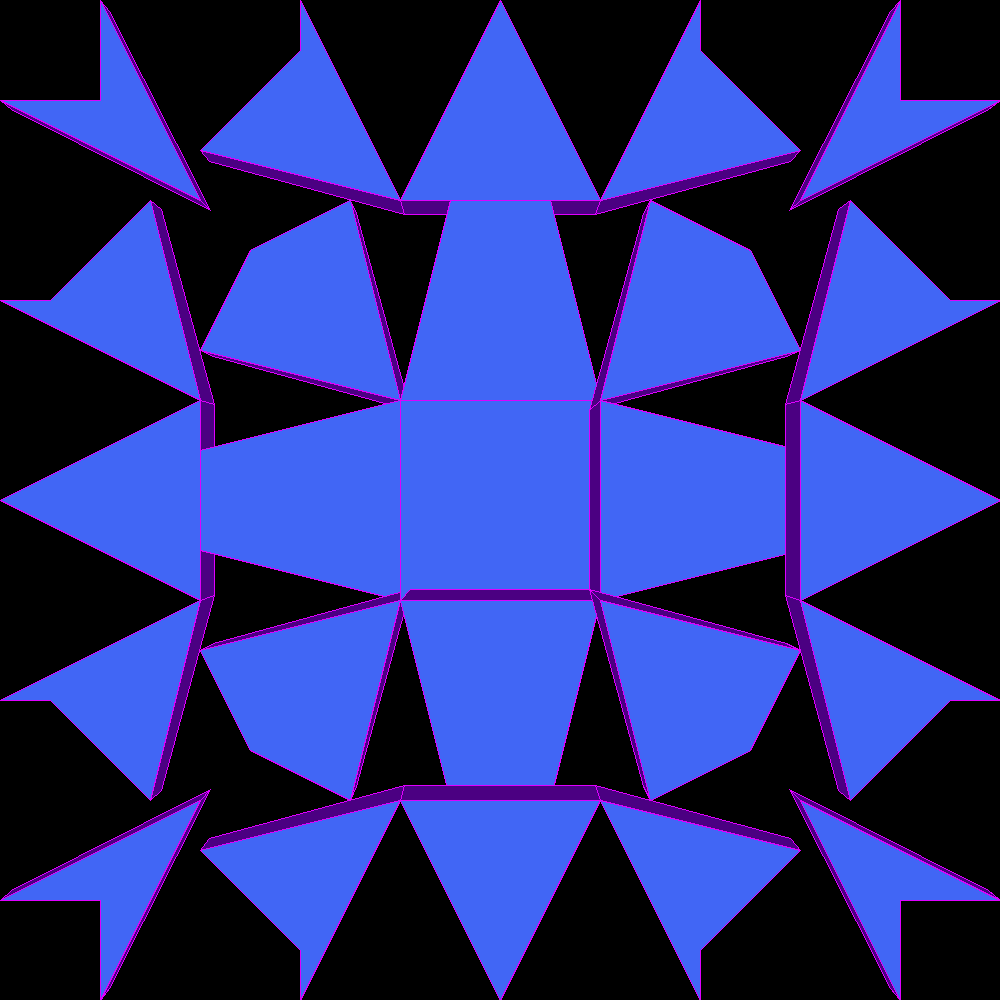

In [30]:
image = Image.new('RGB', (1000,1000))
draw = ImageDraw.Draw(image)
edge_color = (223,0,255)
surface_color = (65,102,245)
side_color = (75,0,130)
for i in range(5):
    for j in range(5):
        pt1 = (i*200 + 100 - 50*min(j,2), j*200 + 100 -50*min(i,2))  # Check
        pt2 = (i*200 + 100 + 50*min(j,2), j*200+ 50*max(i,2) - 100)  #Check
        pt3 = (i*200 + 300 - 50*max(2,j), j*200 + 300 - 50*max(2,i))
        pt4 = (i*200 - 100 + 50*max(2,j), j*200 + 100 + 50*min(2,i))
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 15
        persp_pt = (500,500)
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)
image

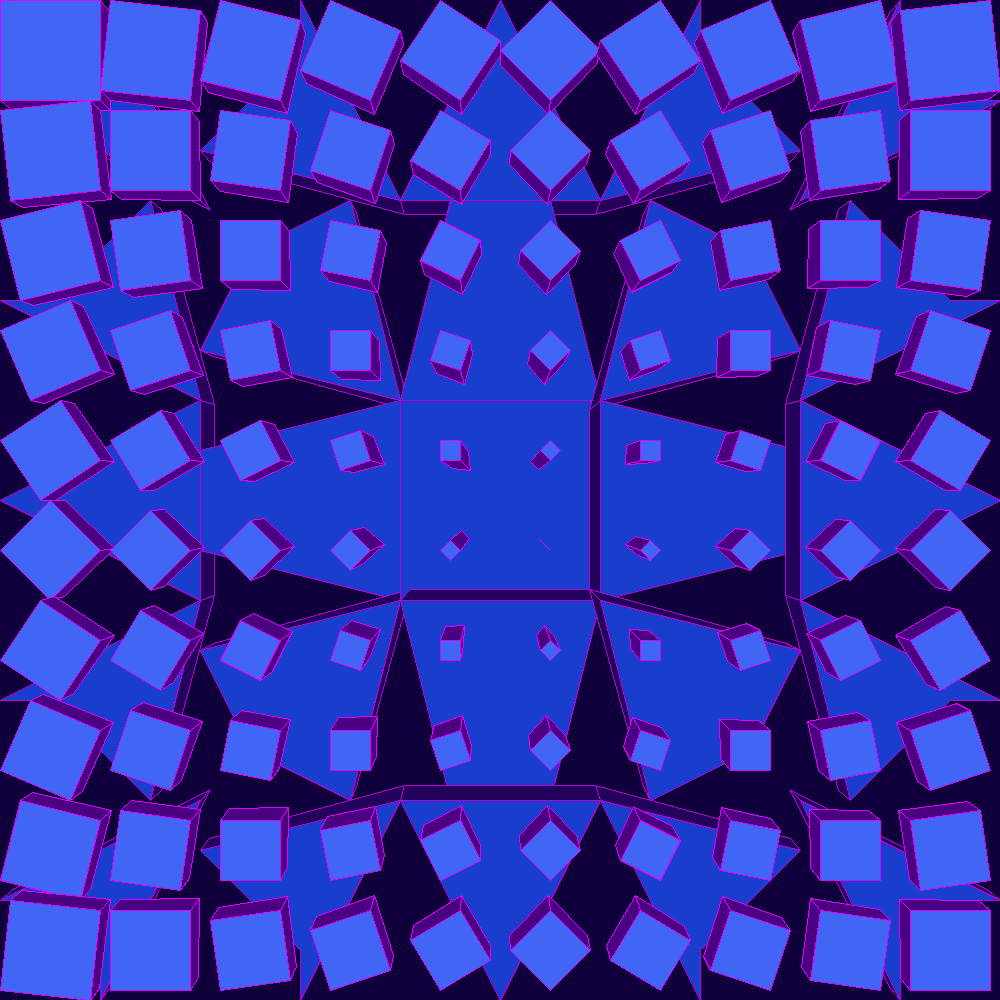

In [46]:
image = Image.new('RGB', (1000,1000), (15,0,60))
draw = ImageDraw.Draw(image)
edge_color = (183,0,215)
surface_color = (25,62,205)
side_color = (35,0,90)
for i in range(5):
    for j in range(5):
        pt1 = (i*200 + 100 - 50*min(j,2), j*200 + 100 -50*min(i,2))  # Check
        pt2 = (i*200 + 100 + 50*min(j,2), j*200+ 50*max(i,2) - 100)  #Check
        pt3 = (i*200 + 300 - 50*max(2,j), j*200 + 300 - 50*max(2,i))
        pt4 = (i*200 - 100 + 50*max(2,j), j*200 + 100 + 50*min(2,i))
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 15
        persp_pt = (500,500)
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)
edge_color = (223,0,255)
surface_color = (65,102,245)
side_color = (75,0,130)
for i in range(10):
    for j in range(10):
        pt1 = (i*100 + 10*i, j*100 + 10*j)
        pt2 = (i*100 + 100 - 10*j, j*100 +10*i)
        pt3 = (i*100+100 -10*i, j*100 +100 - j*10)
        pt4 = (i*100 + 10*j, j*100 +100 - 10*i)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 15
        persp_pt = (500,500)
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)
image

In [48]:
image.save('overlay.png')

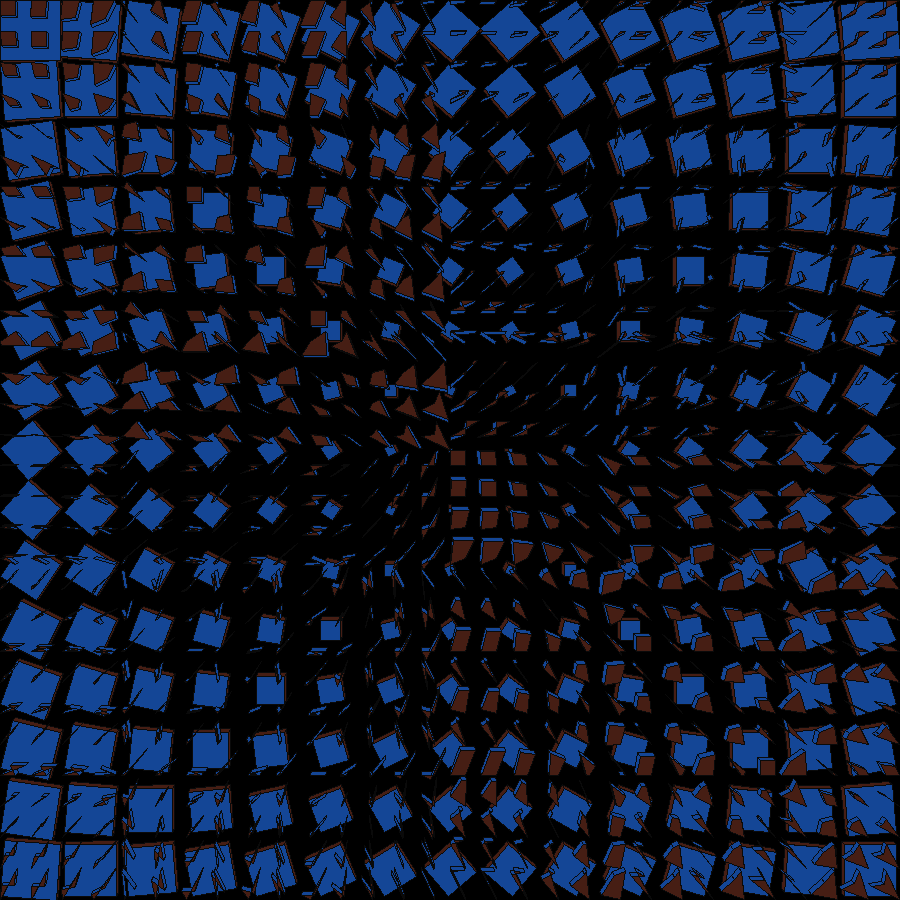

In [18]:
image = Image.new('RGB', (900,900))
draw = ImageDraw.Draw(image)

persp_pt = (450,450)

edge_color = (200,250,200)
surface_color = (20,70,150)
side_color = (70,30,20)
for i in range(15):
    for j in range(15):
        pt1 = (i*60 + 4*i, j*60 +4*j)
        pt2 = (i*60 + 60 - 4*j, j*60 +4*i)
        pt3 = (i*60 +60 - 4*i, j*60 +60 - 4*j)
        pt4 = (i*60 +4*j, j*60 +60 - 4*i)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 4
        persp_pt = (450,450)
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

edge_color = (200,250,200)
surface_color = (70,30,20)
side_color = (20,70,150)

for i in range(30):
    for j in range(30):
        pt1 = (i*30 + i%30, j*30 + j%30)
        pt2 = (i*30 + (15 + i**2)%30, j*30 + (j**2)%30)
        pt3 = (i*30 + (j+15)%30, j*30 + (i+15)%30)
        pt4 = (i*30 + (j**2)%30, j*30 + (15+i**2)%30)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 4
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

image

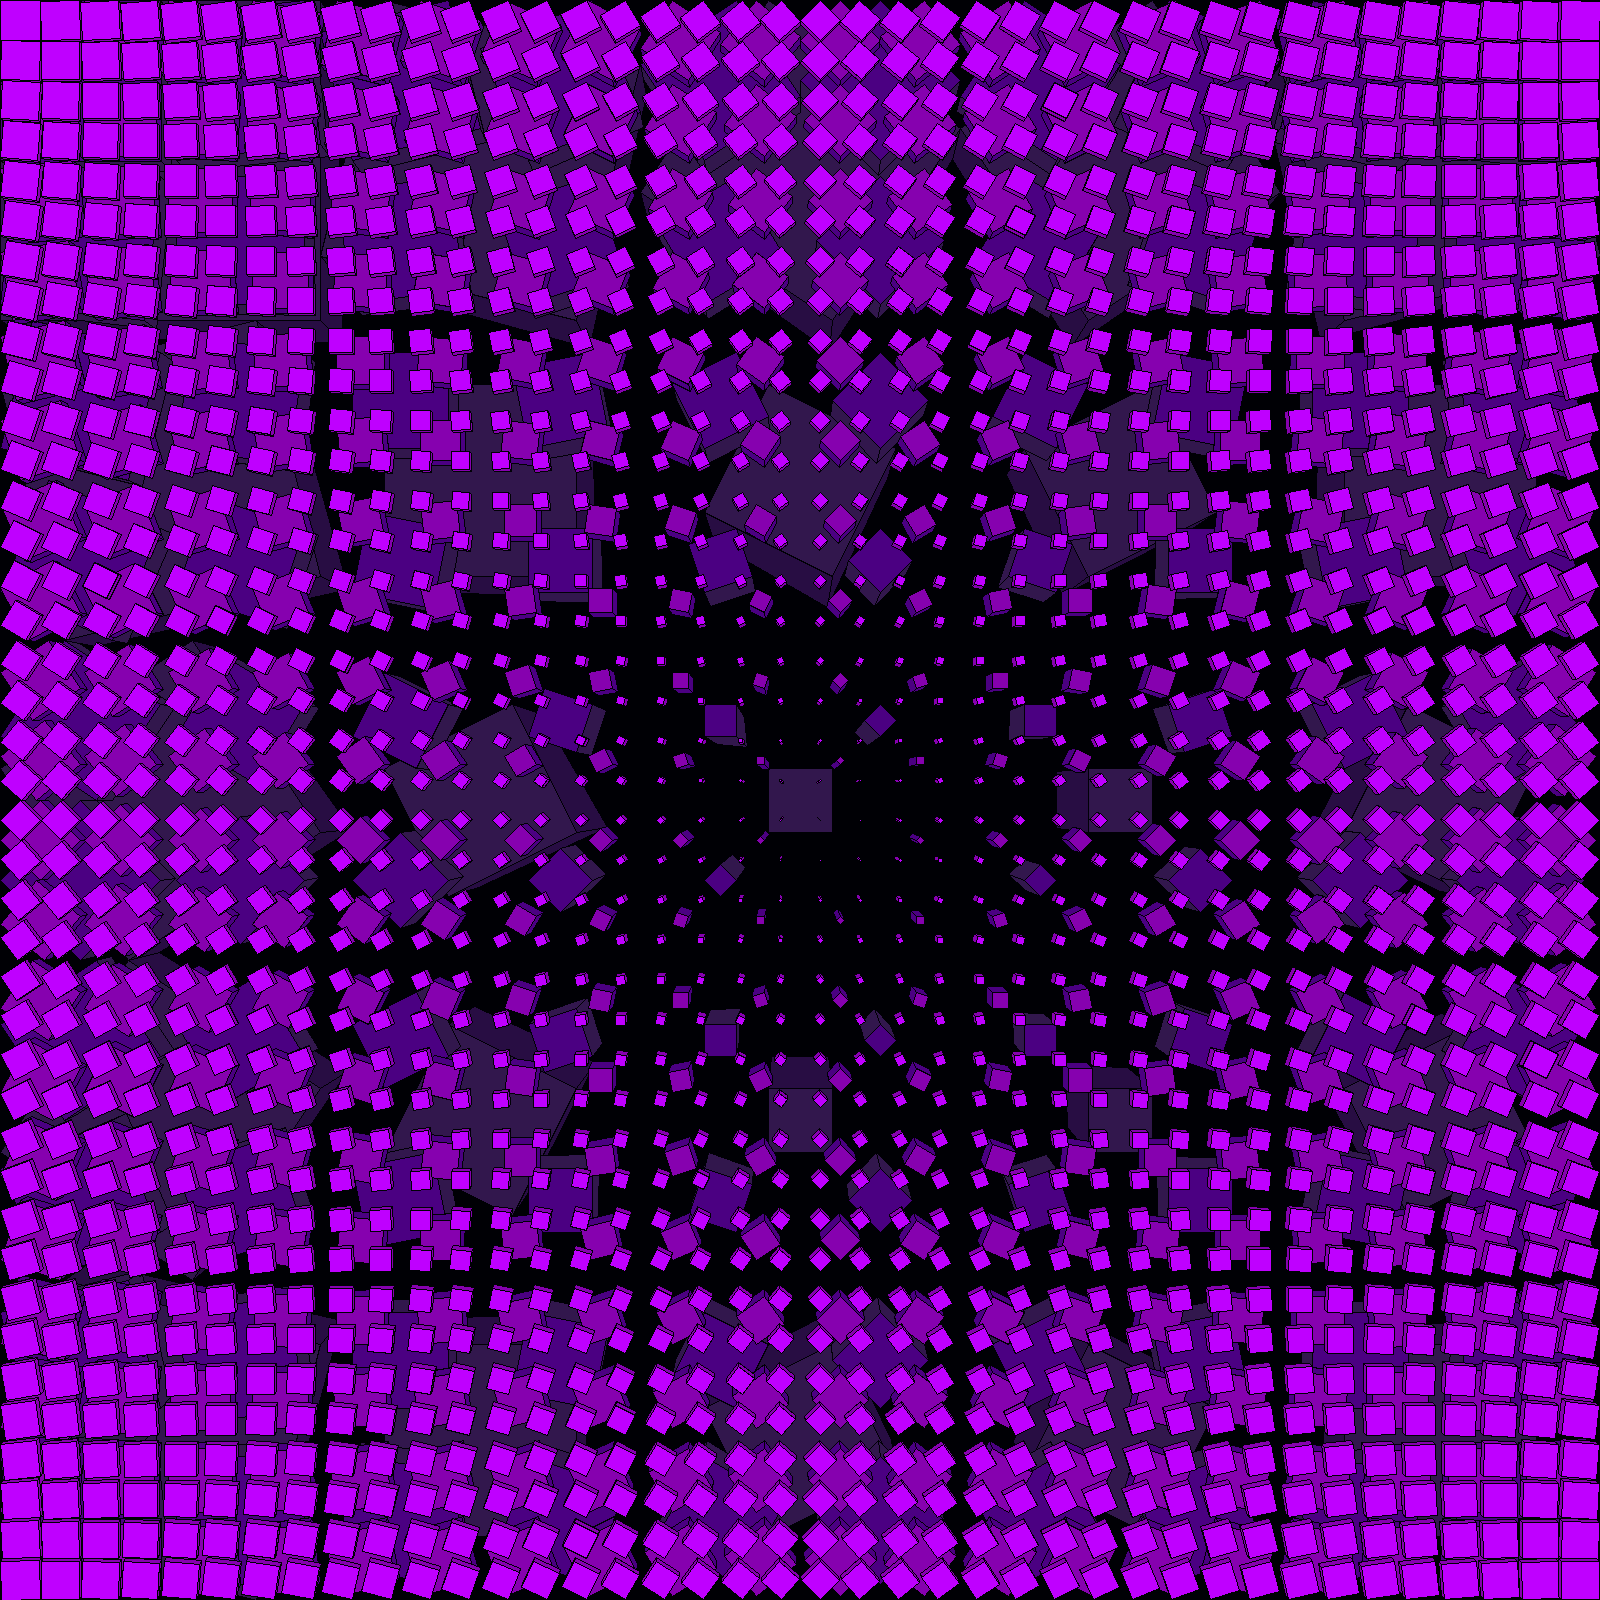

In [46]:
image = Image.new('RGB', (1600,1600), (0,0,5))
draw = ImageDraw.Draw(image)

persp_pt = (800,800)

edge_color = (0,0,5)
surface_color = (50,23,77)
side_color = (40,13,67)

for i in range(5):
    for j in range(5):
        pt1 = (i*320 + 64*i, j*320 +64*j)
        pt2 = (i*320 + 320 - 64*j, j*320 +64*i)
        pt3 = (i*320 + 320 - 64*i, j*320 +320 - 64*j)
        pt4 = (i*320 +64*j, j*320 +320 - 64*i)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 32
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

edge_color = (0,0,5)
surface_color = (75,0,130)
side_color = (50,23,77)

for i in range(10):
    for j in range(10):
        pt1 = (i*160 + 16*j, j*160 +16*i)
        pt2 = (i*160 + 160 - 16*i, j*160 +16*j)
        pt3 = (i*160 + 160 - 16*j, j*160 +160 - 16*i)
        pt4 = (i*160 +16*i, j*160 +160 - 16*j)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 16
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

edge_color = (0,0,5)
surface_color = (134,1,175)
side_color = (75,0,130)

for i in range(20):
    for j in range(20):
        pt1 = (i*80 + 4*i, j*80 +4*j)
        pt2 = (i*80 + 80 - 4*j, j*80 +4*i)
        pt3 = (i*80 + 80 - 4*i, j*80 +80 - 4*j)
        pt4 = (i*80 +4*j, j*80 +80 - 4*i)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 8
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

edge_color = (0,0,5)
surface_color = (191,0,255)
side_color = (134,1,175)

for i in range(40):
    for j in range(40):
        pt1 = (i*40 + j, j*40 + i)
        pt2 = (i*40 + 40 - i, j*40 + j)
        pt3 = (i*40 + 40 - j, j*40 + 40 - i)
        pt4 = (i*40 + i, j*40 + 40 - j)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 4
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

image

In [47]:
image.save('cube_fade.png')

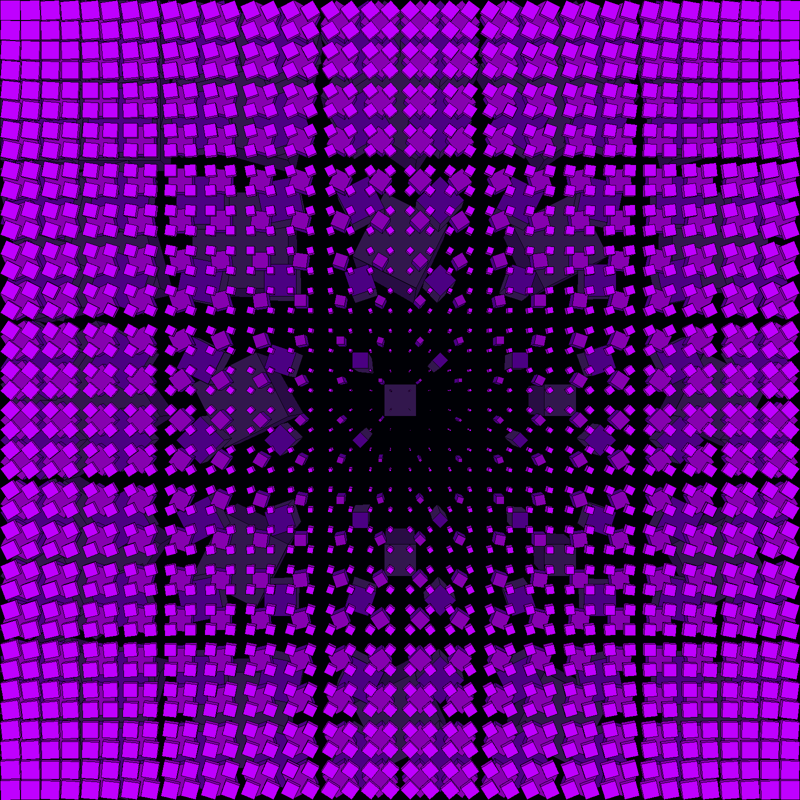

In [48]:
image = image.resize((800,800))
image

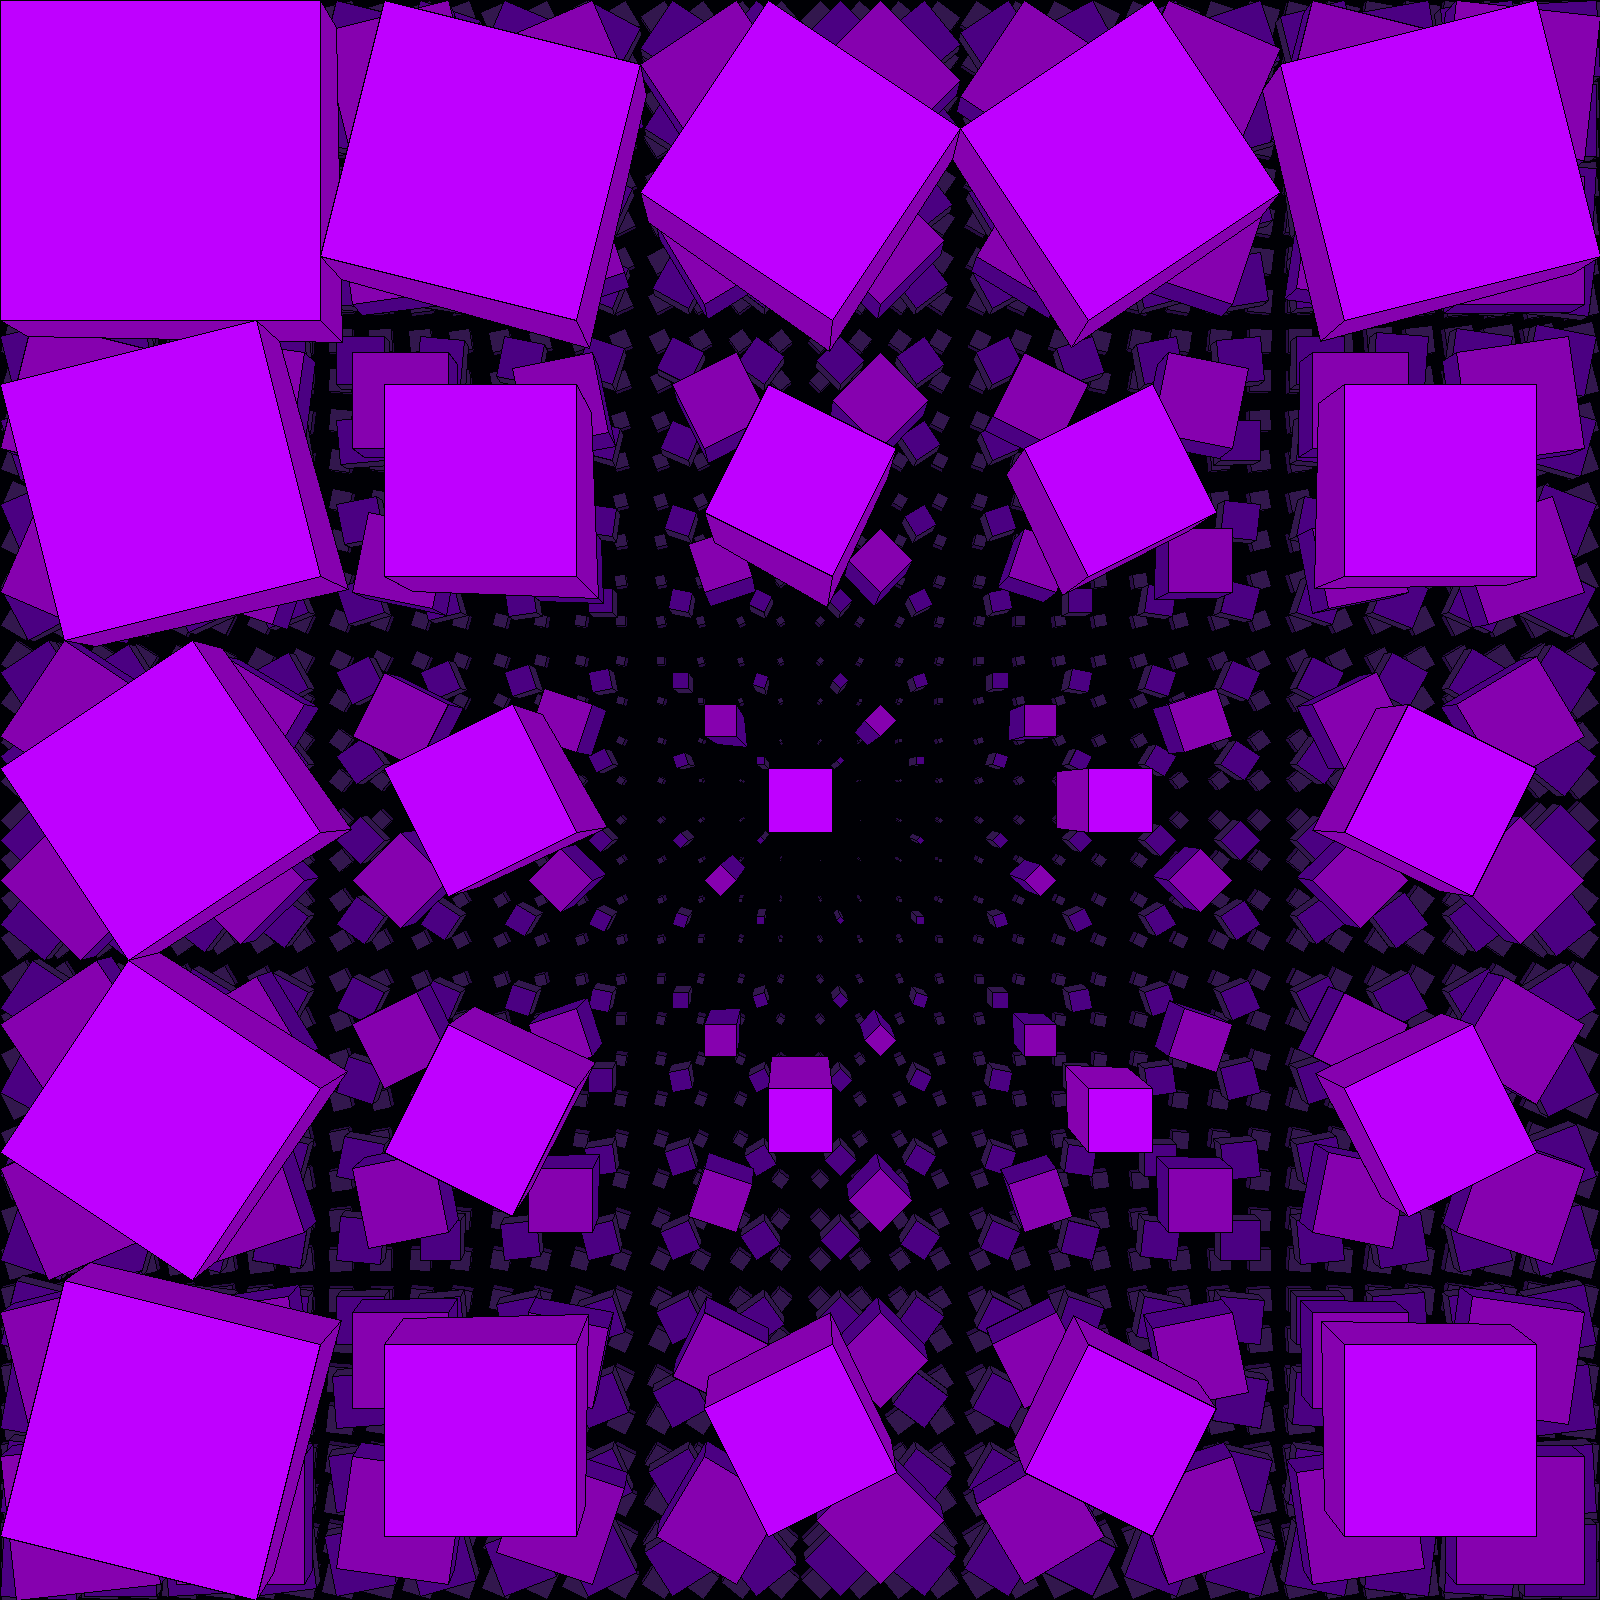

In [52]:
image = Image.new('RGB', (1600,1600), (0,0,5))
draw = ImageDraw.Draw(image)

persp_pt = (800,800)

edge_color = (0,0,5)
surface_color = (50,23,77)
side_color = (40,13,67)

for i in range(40):
    for j in range(40):
        pt1 = (i*40 + j, j*40 + i)
        pt2 = (i*40 + 40 - i, j*40 + j)
        pt3 = (i*40 + 40 - j, j*40 + 40 - i)
        pt4 = (i*40 + i, j*40 + 40 - j)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 4
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

edge_color = (0,0,5)
surface_color = (75,0,130)
side_color = (50,23,77)        

for i in range(20):
    for j in range(20):
        pt1 = (i*80 + 4*i, j*80 +4*j)
        pt2 = (i*80 + 80 - 4*j, j*80 +4*i)
        pt3 = (i*80 + 80 - 4*i, j*80 +80 - 4*j)
        pt4 = (i*80 +4*j, j*80 +80 - 4*i)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 8
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

edge_color = (0,0,5)
surface_color = (134,1,175)
side_color = (75,0,130)

for i in range(10):
    for j in range(10):
        pt1 = (i*160 + 16*j, j*160 +16*i)
        pt2 = (i*160 + 160 - 16*i, j*160 +16*j)
        pt3 = (i*160 + 160 - 16*j, j*160 +160 - 16*i)
        pt4 = (i*160 +16*i, j*160 +160 - 16*j)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 16
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

edge_color = (0,0,5)
surface_color = (191,0,255)
side_color = (134,1,175)        

for i in range(5):
    for j in range(5):
        pt1 = (i*320 + 64*i, j*320 +64*j)
        pt2 = (i*320 + 320 - 64*j, j*320 +64*i)
        pt3 = (i*320 + 320 - 64*i, j*320 +320 - 64*j)
        pt4 = (i*320 +64*j, j*320 +320 - 64*i)
        vertex_list = [pt1, pt2, pt3, pt4]
        depth = 32
        perspective_gon(draw, vertex_list, depth, persp_pt, edge_color, surface_color, side_color)

image

In [53]:
image.save('cube_fade_reverse_2.png')

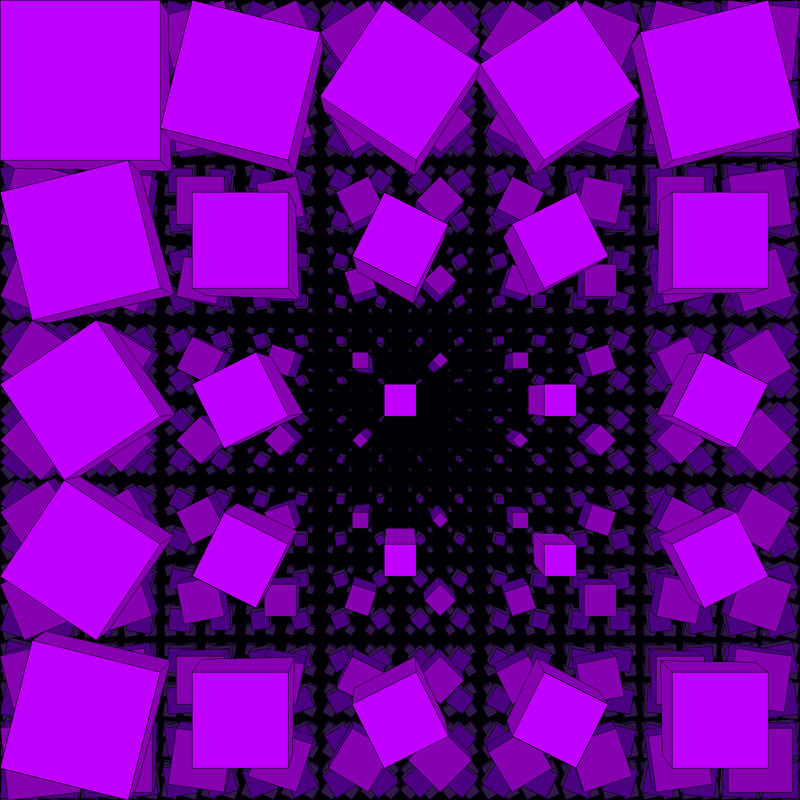

In [54]:
image.resize((800,800))

In [55]:
def create_square(p1, p2):
    dist = dist_betw_points(p1,p2)
    angle = angle_between(p1,p2)
    # line_segment_endpoint(coord, angle, dist, degrees = False)
    p4 = line_segment_endpoint(p1, angle + (np.pi/2), dist)
    p3 = line_segment_endpoint(p2, angle + (np.pi/2), dist)
    return [p1,p2,p3,p4]

In [ ]:
image = Image.